## Ten Important updates from TensorFlow 2.0 

In this article, you will be going through the ten most important updates introduced in the newly released `TensorFlow 2.0` and you will get to implement some of them. 

It is been quite a few days since `TensorFlow 2.0 alpha` released. The framework does have a huge impact on the deep learning community. Practitioners, researchers, developers have loved the framework and have adapted it like never before. It is easily one of the main reasons behind the jump-start of all the super cool deep learning enabled applications that we get to see today. But `TensorFlow 1.x` [has its cons](https://www.tensorflow.org/alpha/guide/effective_tf2#a_brief_summary_of_major_changes) too (like many other frameworks). As [Martin Wicke](https://twitter.com/martin_wicke) (Software Engineer from the `TensorFlow` team) said during **TF Dev Summit '19** - 

> We've learned a lot since 1.0. 

With all the lessons learned from the wide user-base, GitHub issues, the `TensorFlow` team released the `TensorFlow 2.0 alpha` which comes with a significant number of important changes for the betterment of performance, user experience and so on. It enables you with rapid prototyping and includes many modern deep learning practices. In this article, you will get to study some of these changes through precise implementations. 

**Note** that the updates discussed here are the most significant ones according to the author. You will be needing some previous `TensorFlow` and `Keras` experience in order to follow along with this article. Following are some resources which you may find handy in case you are looking for refreshers on `TensorFlow` and `Keras` - 

* [TensorFlow Tutorial For Beginners](https://www.datacamp.com/community/tutorials/tensorflow-tutorial)
* [Keras Tutorial: Deep Learning in Python](https://www.datacamp.com/community/tutorials/deep-learning-python)

## Installation and a demo dataset

Updating to `TensorFlow 2.0` is running the following line of code from a Jupyter Notebook:

`!pip install tensorflow==2.0.0-alpha0`

The GPU variant can also be installed in the same way (requires CUDA before):

`!pip install tensorflow-gpu==2.0.0-alpha0`

You can find more about the installation process [here](https://github.com/tensorflow/community/blob/master/sigs/testing/faq.md). 

Some of the updates that you will be studying will include code implementations. In those cases, you will need a dataset. For this article, you will be using the [Adult dataset](https://archive.ics.uci.edu/ml/datasets/adult) from the UCI Archive. 

In [111]:
import pandas as pd

columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                    header=None,
                    names=columns)

data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The dataset represents a binary classification task which is to predict if an individual would earn more than $50k per year or not given a set of personal details. 

Let's do some basic data preprocessing and then set up the data splits in an 80:20 ratio:

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Label Encode
le = LabelEncoder()
data = data.apply(le.fit_transform)

# Segregate data features & convert into NumPy arrays
X = data.iloc[:, 0:-1].values
y = data['Income'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

By now, you should have a working environment with `TensorFlow 2.0` installed and a dataset loaded into your workspace. You can straightly proceed towards the updates. 

## 1. Eager execution by default

In `TensorFlow 2.0`, you no longer need to create a session and run the computational graph within that. [Eager execution](https://www.tensorflow.org/alpha/guide/eager) is enabled by default in the 2.0 release so that you can build your models and run them instantly. You can choose to disable the eager execution like so :

`tf.compat.v1.disable_eager_execution()` (provided `tensorflow` is imported with `tf` alias.) 

Here's a little code-based comparison that shows this difference - 

![](https://i.ibb.co/R0pn24K/Untitled-Diagram.png)

## 2. tf.function and AutoGraph

While eager execution enables you with imperative programming, when it comes to distributed training, full-scale optimization, production environments `TensorFlow 1.x` style graph execution has its advantages over eager execution. In `TensorFlow 2.0`, you retain graph based executions but in a more flexible way. It is achieved with [`tf.function`](https://www.tensorflow.org/alpha/tutorials/eager/tf_function) and [`AutoGraph`](https://www.tensorflow.org/alpha/guide/autograph). 

`tf.function` allows you to define `TensorFlow` graphs with Python style syntax via its `AutoGraph` feature. `AutoGraph` supports a good range of Python compatibility including `if-statement`, `for-loop`, `while-loop`, `Iterators` etc. However, there are limitations. [Here](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/LIMITATIONS.md#python-language-support-status) you can find the complete list of supports that are currently available. Below is an example that shows you how easy it is to define a `TensorFlow` graph with just a `decorator`. 

In [16]:
import tensorflow as tf 

# Define the forward pass
@tf.function
def single_layer(x, y):
    return tf.nn.relu(tf.matmul(x, y))

# Generate random data drawn from a uniform distribution
x = tf.random.uniform((2, 3))
y = tf.random.uniform((3, 5))

single_layer(x, y)

<tf.Tensor: id=73, shape=(2, 5), dtype=float32, numpy=
array([[0.5779363 , 0.11255255, 0.26296678, 0.12809312, 0.23484911],
       [0.5932371 , 0.1793559 , 0.2845083 , 0.23249313, 0.21367362]],
      dtype=float32)>

Notice that you did not have to create any sessions or placeholders to run the function `single_layer()`. This is one of the nifty features of `tf.function`. Behind the hood, it does all the necessary optimizations so that your code runs faster. 

## 3. `tf.variable_scope` no longer needed

In `TensorFlow 1.x`, to be able to use `tf.layers` as variables and to reuse them, you had to use the `tf.variable` block. But this is no longer needed in `TensorFlow 2.0`. Because of the presence of `keras` as the center high-level API in `TensorFlow 2.0`, all the layers created using `tf.layers` can easily be put into a `tf.keras.Sequential` definition. This makes the code much easier to read and you get to keep track of the variables and losses as well. 

Here's an example: 

In [68]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Get the output probabilities
out_probs = model(X_train.astype(np.float32), training=True)
print(out_probs)

tf.Tensor(
[[1.        ]
 [0.12573627]
 [1.        ]
 ...
 [1.        ]
 [1.        ]
 [1.        ]], shape=(26048, 1), dtype=float32)


In the above example, you passed the training data through the `model` just to get the raw output probabilities. Notice that it is just a forward pass. You can, of course, go ahead and train your model - 

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=5, batch_size=64)

Train on 26048 samples, validate on 6513 samples
Epoch 1/5
26048/26048 [==============================] - 2s 62us/sample - loss: 79.5270 - val_loss: 0.7142
Epoch 2/5
26048/26048 [==============================] - 1s 48us/sample - loss: 2.0096 - val_loss: 0.5894
Epoch 3/5
26048/26048 [==============================] - 1s 47us/sample - loss: 0.8750 - val_loss: 0.5761
Epoch 4/5
26048/26048 [==============================] - 1s 49us/sample - loss: 0.6650 - val_loss: 0.5629
Epoch 5/5
26048/26048 [==============================] - 1s 47us/sample - loss: 0.6885 - val_loss: 0.5539


You can get a list of the model's trainable parameters in a layer by layer manner like so - 

In [27]:
# Model's trainable parameters in a layer by layer fashion
model.trainable_variables

[<tf.Variable 'dense_12/kernel:0' shape=(14, 64) dtype=float32, numpy=
 array([[-1.48688853e-02,  2.74527162e-01,  2.58149177e-01,
         -2.35980123e-01,  7.92130232e-02, -1.19770452e-01,
          1.83823228e-01,  2.26748139e-01, -1.31252930e-01,
         -1.67176753e-01,  1.43430918e-01,  2.32805759e-01,
          2.47395486e-01,  8.89694989e-02,  1.75705254e-02,
         -2.01672405e-01,  2.01087326e-01, -1.67460442e-01,
         -1.03051037e-01, -2.56078333e-01, -6.07236922e-02,
          4.76933420e-02, -4.65645194e-02,  2.20712095e-01,
          1.98741913e-01,  9.32294428e-02,  1.51318759e-01,
         -3.96257639e-03, -1.51869521e-01,  8.89182389e-02,
         -4.22340333e-02,  1.55168772e-03, -7.01716542e-03,
         -8.23616534e-02, -1.85766399e-01, -1.97881564e-01,
          1.94241285e-01,  2.11566478e-01, -1.68947518e-01,
         -2.34904587e-01, -8.28040987e-02, -1.37671828e-02,
          3.46715450e-02,  9.42899585e-02,  9.07505751e-02,
          2.64314085e-01,  4.

## 4. Custom layers made very easy

In machine learning research or even in industrial applications, there is often a need for writing custom layers to cater to specific use cases. `TensorFlow 2.0` makes it super easy to write a custom layer and use it along with the existing layers. You can also customize the forward pass of your model in any way you want.

In order to create a custom layer, the easiest option is to extend the `Layer` class from `tf.keras.layers` and then define it accordingly. You will create a custom layer and you will then define its forward computations. Following is the output of executing `help(tf.keras.layers.Layer)`. It tells you what are the things you need to specify in order to get this done:

![](https://i.ibb.co/5xC30pk/Screenshot-from-2019-05-24-17-43-26.png)

Taking help from the above snippet, you will - 
* Define the constructor with the number of the outputs
* In the `build()` method you will add the weights for your layer
* Finally in the `call()` method you will define the forward pass by chaining matrix multiplication and `relu()` together

In [62]:
class MyDenseLayer(tf.keras.layers.Layer):
    # Define the constructor
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
    # Define the build function to add the weights
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel",
                                    shape=[input_shape[-1],
                                           self.num_outputs])
    # Define the forward pass
    def call(self, input):
        matmul = tf.matmul(input, self.kernel)
        return tf.nn.relu(matmul)

# Initialize the layer with 10 output units
layer = MyDenseLayer(10)
# Supply the input shape
layer(tf.random.uniform((10,3)))
# Display the trainable parameters of the layer
print(layer.trainable_variables)

[<tf.Variable 'my_dense_layer_7/kernel:0' shape=(3, 10) dtype=float32, numpy=
array([[ 0.43613756,  0.21344548,  0.37803996,  0.65583944,  0.11884308,
         0.13909656,  0.30802298,  0.5313586 ,  0.04967308,  0.32889426],
       [ 0.1680265 , -0.59944266, -0.4014195 ,  0.14887196,  0.07071263,
         0.37862527, -0.5822403 , -0.5963166 ,  0.3106798 ,  0.05353856],
       [-0.44345278, -0.23122305, -0.62959856, -0.43062705,  0.13194847,
        -0.60124606, -0.62745696,  0.12254918, -0.09806103, -0.45324165]],
      dtype=float32)>]


You can compose multiple layers by extending `Model` class from `tf.keras`. You can find more about composing models [here](https://www.tensorflow.org/alpha/tutorials/eager/custom_layers#models_composing_layers). 

## 5. Flexibility in model training

`TensorFlow` can use [automatic differentiation](https://www.tensorflow.org/alpha/tutorials/eager/automatic_differentiation) to compute the gradients of the loss function with respect to model parameters. `tf.GradientTape` creates a tape within a context which is used by `TensorFlow` to keep track of the gradients recorded from each computation in that tape. To understand this, let's define a model in a more low-level by extending the `tf.keras.Model` class.

In [189]:
from tensorflow.keras import Model

class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.do1 = tf.keras.layers.Dropout(rate=0.2, input_shape=(14,))
        self.fc1 = tf.keras.layers.Dense(units=64, activation='relu')
        self.do2 = tf.keras.layers.Dropout(rate=0.2)
        self.fc2 = tf.keras.layers.Dense(units=64, activation='relu')
        self.do3 = tf.keras.layers.Dropout(rate=0.2)
        self.out = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, x):
        x = self.do1(x)
        x = self.fc1(x)
        x = self.do2(x)
        x = self.fc2(x)
        x = self.do3(x)
        return self.out(x)

model = CustomModel()

Notice that the topology of this model is exactly the same as the one you defined earlier. 
To be able to train this model using automatic differentiation, you need to define the loss function and the optimizer in a different way - 

In [190]:
loss_func = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

You will now define the metrics which will be used to measure the performance of the network turning its training. By performance, model's loss and accuracy are meant here.

In [191]:
# Average the loss across the batch size within an epoch
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.BinaryAccuracy(name='train_acc')

valid_loss = tf.keras.metrics.Mean(name='test_loss')
valid_acc = tf.keras.metrics.BinaryAccuracy(name='valid_acc')

`tf.data` provides utility methods to define input data pipelines. This is particularly very useful when you are dealing with a large volume of data. 

You will now define the data generator which will generate batches of data during the model's training.

In [192]:
X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)
y_train, y_test = y_train.astype(np.int64), y_test.astype(np.int64)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

# Batches of 64
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

You are now ready to train the model using `tf.GradientTape`. Firstly, you will define a method which will train the model with the data you just defined using `tf.data.DataSet`. You will also wrap the model training steps with the `tf.function` decorator to take the advantage of the speedup it offers in the computation. 

### Model training and validation

In [193]:
# Train the model
@tf.function
def model_train(features, labels):
    # Define the GradientTape context
    with tf.GradientTape() as tape:
        # Get the probabilities
        predictions = model(features)
        # Calculate the loss
        loss = loss_func(labels, predictions)
    # Get the gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    # Update the weights
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_acc(labels, predictions)

In [194]:
# Validating the model
@tf.function
def model_validate(features, labels):
    predictions = model(features)
    t_loss = loss_func(labels, predictions)

    valid_loss(t_loss)
    valid_acc(labels, predictions)

Use the above two methods to train and validate the model for 5 epochs.

In [195]:
for epoch in range(5):
    for features, labels in train_ds:
        model_train(features, labels)

    for test_features, test_labels in test_ds:
        model_validate(test_features, test_labels)

    template = 'Epoch {}, train_loss: {}, train_acc: {}, train_loss: {}, test_acc: {}'
    print (template.format(epoch+1,
                         train_loss.result(),
                         train_acc.result()*100,
                         valid_loss.result(),
                         valid_acc.result()*100))

Epoch 1, train_loss: 9.8155517578125, train_acc: 66.32754516601562, train_loss: 2.8762073516845703, test_acc: 78.96514892578125
Epoch 2, train_loss: 10.235926628112793, train_acc: 67.04353332519531, train_loss: 3.508544921875, test_acc: 79.0572738647461
Epoch 3, train_loss: 8.876679420471191, train_acc: 67.97962951660156, train_loss: 4.440890789031982, test_acc: 78.7348403930664
Epoch 4, train_loss: 8.136384963989258, train_acc: 68.46015167236328, train_loss: 3.812603235244751, test_acc: 73.58360290527344
Epoch 5, train_loss: 7.779866695404053, train_acc: 68.70469665527344, train_loss: 3.80180025100708, test_acc: 74.73975372314453


This example is inspired by [this example](https://www.tensorflow.org/alpha/tutorials/quickstart/advanced) by `TensorFlow 2.0`'s authors.

## 6. TensorFlow datasets

A separate module named `DataSets` to operate with the network model in an elegant way. You already saw this in the earlier example. In this section, you will see how you can load in the MNIST dataset just in the way you want.

You can install the `tensorflow_datasets` library with `pip`. Once it is installed you are ready to go. It provides a number of utility functions to help you prepare your dataset construction pipeline in a flexible way. You can check more about these functions [here](https://github.com/tensorflow/datasets) and [here](https://www.youtube.com/watch?v=-nTe44WT0ZI). You will now see how you can build a data input pipeline to load in the MNIST dataset. 

In [202]:
import tensorflow_datasets as tfds

# You can fetch the DatasetBuilder class by string
mnist_builder = tfds.builder("mnist")

# Download the dataset
mnist_builder.download_and_prepare()

# Construct a tf.data.Dataset: train and test
ds_train, ds_test = mnist_builder.as_dataset(split=[tfds.Split.TRAIN, tfds.Split.TEST])

You can ignore the warning. Notice how elegantly `tensorflow_datasets` handled the pipeline. 

In [203]:
# Prepare batches of 128 from the training set
ds_train = ds_train.batch(128)

# Load in the dataset in the simplest way possible
for features in ds_train:
    image, label = features["image"], features["label"]

You can now display the first image from the collection of images you loaded in. **Note** that `tensorflow_datasets` works in eager mode and in a graph based setting as well. 

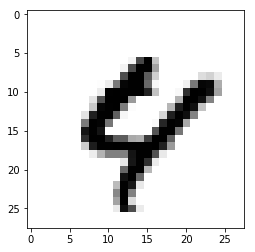

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline

# You can convert a TensorFlow tensor just by using
# .numpy()
plt.imshow(image[0].numpy().reshape(28, 28), cmap=plt.cm.binary)
plt.show()

## 7. Automatic mixed precision policy

Mixed precision policy was proposed by NVIDIA last year. You can find the original paper [here](https://arxiv.org/abs/1710.03740). The brief idea behind mixed precision policy is to use a mixture of half (FP16) and full precision (FP32) and take advantages of both the worlds. It has shown amazing results in the training of very deep neural networks (both in terms of time and score). 

If you are on a CUDA enabled GPU environment (Volta Generation, Tesla T4 for example) and you installed the GPU variant of `TensorFlow 2.0`, you can instruct `TensorFlow` to train in mixed precision like so - 

`os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'`

This will automatically cast the operations of a TensorFlow graph accordingly. You will be able to see a good amount of boost in your model's performance. You can also optimize TensorFlow core operations with mixed precision policy. Check [this article](https://docs.nvidia.com/deeplearning/sdk/mixed-precision-training/index.html) to know more on this. 

## 8. Distributed training

`TensorFlow 2.0` makes it super easy to distribute the training process across multiple GPUs. This is particularly useful for production purpose when you have to meet super heavy loads. This is as easy as putting your model training block inside a `with` block. 

First, you specify a distribution strategy like so:

`mirrored_strategy = tf.distribute.MirroredStrategy()`

A mirrored strategy creates one replica per GPU and the model variables are equally mirrored across GPUs. You can now use the defined strategy like the following:

```python
with mirrored_strategy.scope():
    model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
    model.compile(loss='mse', optimizer='sgd')
    model.fit(X_train, y_train,
             validation_data=(X_test, y_test),
             batch_size=128,
             epochs=10)
```

**Note** that the above piece of code will only be useful if you have multiple GPUs configured on a single system. There are a number of distribution strategies you can configure. You can find more about it [here](https://www.tensorflow.org/alpha/guide/distribute_strategy).

## 9. TensorBoard within Jupyter Notebook

This is probably the most exciting part of this update. You can visualize the model training directly within your Jupyter Notebook via `TensorBoard`. The new `TensorBoard` is loaded with a lot of exciting features like memory profiling, viewing image data including confusion matrix, conceptual model graph and so on. You can find more about this [here](https://www.tensorflow.org/tensorboard/r2/get_started). 

In this section, you will configure your environment such that the `TensorBoard` is displayed within Jupyter Notebook. You will first have load the `tensorboard.notebook` notebook extension - 


In [209]:
%load_ext tensorboard.notebook

You will now define the `TensorBoard` callback using the `tf.keras.callbacks` module. 

In [210]:
from datetime import datetime
import os

# Make a directory to keep the training logs
os.mkdir("logs")

# Set the callback
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Rebuild the model using the `Sequential` API of `tf.keras` - 

In [217]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The train and test sets were modified for different uses. So, it will be a good idea to split them once again - 

In [215]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

You are all ready to train the model - 

In [218]:
# The TensorBoard extension
%tensorboard --logdir logs/
# Pass the TensorBoard callback you defined
model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         batch_size=64,
         epochs=10,
         callbacks=[tensorboard_callback],
         verbose=False)

The `TensorBoard` dashboard should be loaded in your Jupyter Notebook and you should be able to trace the training and validation metrics. 

## 10. TensorFlow for Swift

Despite all the incredible success, one thing very saddening about Python is that it is **slow**. To help researchers and practitioners and even beginners the `TensorFlow` team has developed a version for Swift. Although it is not as production ready as the Python variant it certainly has the potential. Swift allows for more low-level interactions and advanced compilation modules. This is [where](https://github.com/tensorflow/swift) you will be able to find everything related to TensorFlow's Swift variant. You are also encouraged to see [this interview](https://www.youtube.com/watch?v=drSpCwDFwnM) of [Jeremy Howard](https://twitter.com/jeremyphoward) conducted by [Josh Gordon](https://www.linkedin.com/in/joshuabendergordon) where Jeremy shares his views on this direction. 

## What's next?

You have come to an end for this article. The beauty of deep learning lies in its application. Your immediate next step should be try the ideas discussed in this article and incorporate your own ones too. This `TensorFlow` update is easily one of the most comprehensive and developer friendly ones. You are encouraged to check this YouTube watchlist of this year's `TensorFlow` Dev Summit which will provide you with the additional updates on `TensorFlow lattice`, `TensorFlow probability`, `TensorFlow lite` and so on. 

If you are interested in strengthening your deep learning knowledge, you may check out the following courses: 
- [Introduction to TensorFlow in Python](https://www.datacamp.com/courses/introduction-to-tensorflow-in-python#!)
- [Advanced Deep Learning with Keras in Python](https://www.datacamp.com/courses/advanced-deep-learning-with-keras-in-python)

Happy `eager_execut`ing!